In [39]:
# Importación de Librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importación para dividir los datos y su entrenamiento con cross
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Modelos de ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Formación de pipilines para tener el preprocesamiento incluido en el modelo
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Metricas
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

#Scaler
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Lectura del dataset
df=pd.read_csv('https://raw.githubusercontent.com/Sayan2509/Productivity-Prediction-of-Garment-Employees/refs/heads/main/garments_worker_productivity.csv')

# Iinformación del Datset
Descripición de las variables


* 01 date: Fecha en formato MM-DD-AAAA
* 02 day: Día de la semana
* 03 quarter: Parte del mes. El mes se dividía en cuatro trimestres.
* 04 department: Departamento asociado a la instancia.
* 05 team_no: Número de equipo asociado a la instancia.
* 06 no_of_workers: Número de trabajadores en cada equipo.
* 07 no_of_style_change: Número de cambios en el estilo de un producto en particular.
* 08 targeted_productivity: Productividad objetivo establecida por la Autoridad para cada equipo por día.
* 09 smv: Standard Minute Value. Tiempo asignado a una tarea.
* 10 wip: Trabajo en curso. Incluye el número de elementos sin terminar.
* 11 over_time: Representa la cantidad de horas extra de cada equipo en minutos.
* 12 incentive: Representa la cantidad de incentivo financiero (en BDT) que habilita o motiva una acción específica.
* 13 idle_time: Tiempo en que la producción se interrumpió por diversas razones.
* 14 idle_men: Número de trabajadores inactivos debido a una interrupción de la producción.
* 15 actual_productivity: Porcentaje real de productividad de los trabajadores. Varía entre 0 y 1.



In [41]:
# Visualización del dataset
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Preprocesamiento del dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [79]:
import plotly.graph_objects as go

# Agrupar por día y calcular la media
df_daily = df.groupby('date').agg({
    'targeted_productivity': 'mean',
    'actual_productivity': 'mean'
}).reset_index()

# Filtrar un rango de fechas (enero-marzo 2015)
df_subset = df_daily[(df_daily['date'] >= '2015-01-01') & (df_daily['date'] <= '2015-03-31')]

# Crear el gráfico
fig = go.Figure()

# Línea de Targeted Productivity
fig.add_trace(go.Scatter(
    x = df_subset['date'],
    y = df_subset['targeted_productivity'],
    mode = 'lines',
    name = 'Targeted Productivity'
))

# Línea de Actual Productivity
fig.add_trace(go.Scatter(
    x = df_subset['date'],
    y = df_subset['actual_productivity'],
    mode = 'lines+markers',
    name = 'Actual Productivity'
))

# Ajustes de layout
fig.update_layout(
    title = {'text': 'Actual & Targeted Productivity over Time (Daily Average)',
             'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
    legend = {'x': 0.73, 'y': 0.95},
    xaxis_title = 'Date',
    yaxis_title = 'Productivity',
    template = 'plotly_white'
)

# Graficando
fig.show()

In [43]:
# Descomposición de la variable date
date=pd.to_datetime(df['date'])
df['año']=date.dt.year
df['mes']=date.dt.month
df['dia']=date.dt.day

# Guardar la variable date fuera del dataset
date=df['date']

# Eliminando la variable original
df.drop('date',axis=1,inplace=True)

In [44]:
# valores de las variables categoricas
variables_categoricas=['quarter','department','day']
for vars in variables_categoricas:
  print('la variable ',vars, 'tiene los valores: ', df[vars].unique())

la variable  quarter tiene los valores:  ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
la variable  department tiene los valores:  ['sweing' 'finishing ' 'finishing']
la variable  day tiene los valores:  ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


In [45]:
# La variable department presenta dos variables repetidas:'finishing 'y'finishing'. Se va corregir estos valores

df.loc[df['department']=='finishing ',['department']]='finishing'
df['department'].unique()

array(['sweing', 'finishing'], dtype=object)

In [46]:
# distribución en las variables numéricas
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,año,mes,dia
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.0,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,2015.0,1.724311,13.533835
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,0.0,0.744558,8.623967
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,2015.0,1.000000,1.000000
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,2015.0,1.000000,6.000000
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,2015.0,2.000000,12.000000
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,2015.0,2.000000,21.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,2015.0,3.000000,31.000000


In [47]:
# La variable año solo posee un valor, la cual es 2015. Debido a que no aporta información, se procederá a eliminarla
df.drop('año',axis=1, inplace=True)

In [48]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,mes,dia
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1


In [49]:
# La variable 'wip' presenta vacios. Estos vacios tienen una relación el valor 'finishing'
# OPCIÓN1: Por mientras se llenará con 0 a los valores de 'wip' que se relacionen con 'finishing', ya que es un proceso de refinamiento
# df.loc[df['department']=='finishing','wip'] = 0
# OPCIÓN 2:
#df.drop['department',axis=1, inplace=True]

In [50]:
# Conversión de las variables categóricas a numéricas
df = pd.get_dummies(df, columns = ['quarter','department','day'])

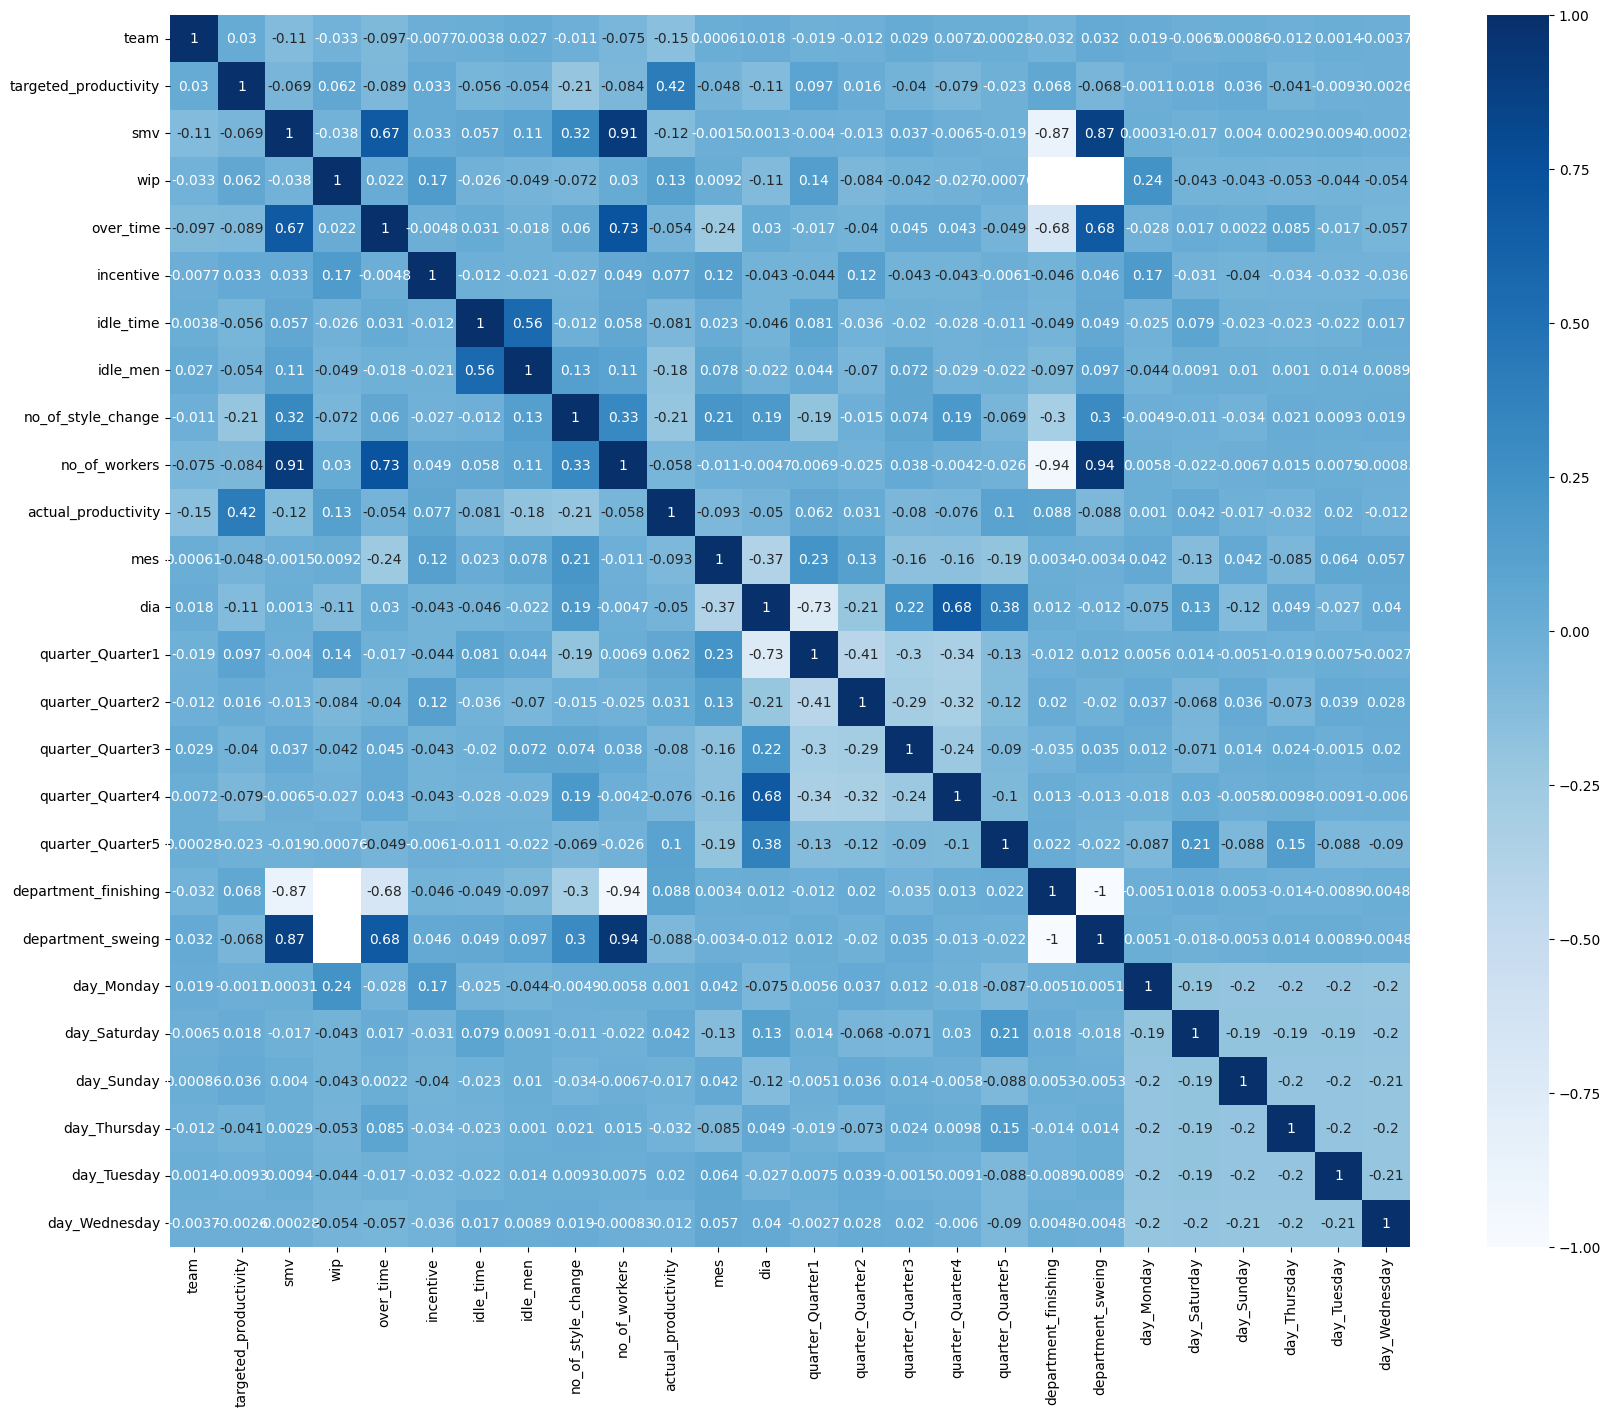

In [51]:
# matriz de correlación
#Filtración de las variables numéricas
df_corr= df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

In [52]:
# Aplicamos un filtro para mantener solo correlaciones mayores a 0.85 (y distintas de 1)
df_high_corr = df_corr[(df_corr.abs() > 0.85) & (df_corr.abs() < 1.0)]

# Nos quedamos solo con las correlaciones mayores a 0.85
df_high_corr = df_high_corr.dropna(how='all').dropna(axis=1, how='all')

df_high_corr

,smv,no_of_workers,department_finishing,department_sweing
smv,NaN,0.912176,-0.87423,0.87423
no_of_workers,0.912176,NaN,-0.93936,0.93936
department_finishing,-0.874230,-0.939360,NaN,-1.00000
department_sweing,0.874230,0.939360,-1.00000,NaN


In [53]:
#Dropeamos todo menos no_of_workers
df.drop(columns=["smv","department_finishing","department_sweing"], inplace=True,axis=0)
df.describe()

,team,targeted_productivity,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,mes,dia
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,1.724311,13.533835
std,3.463963,0.097891,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,0.744558,8.623967
min,1.000000,0.070000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,1.000000,1.000000
25%,3.000000,0.700000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,1.000000,6.000000
50%,6.000000,0.750000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,2.000000,12.000000
75%,9.000000,0.800000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,2.000000,21.000000
max,12.000000,0.800000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,3.000000,31.000000


In [54]:
# Se eliminará la variable wip
df.drop('wip', axis=1, inplace=True)
# Se eliminará la variable team, por solo almacenar el nombre de la cuadrilla
#df.drop('team', axis=1, inplace=True)

In [55]:
#En la base de datos dice que debe ser valores de 0 a 1. Pero hay valores mayores a 1, esto lo corrige.
#Eliminar si es que se concluye que valores mayores a 1 no esten mal (como productividad de 110%). No se si tenga sentido tho
df = df[df['actual_productivity'] <= 1]

In [56]:
# df['actual_productivity'] = pd.cut(
#     df['actual_productivity'],
#     bins=[-float('inf'), 0.33, 0.66, float('inf')],
#     labels=[0,1,2]
# )
# # baja=0, media=1, alta=2

In [57]:
# df['actual_productivity'].unique()

In [58]:
# df['actual_productivity'].value_counts()

In [59]:
#Dividir el actual productivity en clases balanceadas. Los cut-offs ahora se dan en 0.7 y 0.8.
#Antes se dividia en 0.33 y 0.66, pero era muy desbalanceado y daba scores engañosos por eso
print(df['actual_productivity'].quantile([0.0, 0.33, 0.66, 1.0]))
df['actual_productivity'] = pd.qcut(df['actual_productivity'], q=3, labels=[0, 1, 2])
print(df['actual_productivity'].value_counts())

0.00    0.233705
0.33    0.700167
0.66    0.800402
1.00    0.999995
Name: actual_productivity, dtype: float64
actual_productivity
0    387
2    387
1    386
Name: count, dtype: int64


<ipython-input-59-495724963>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

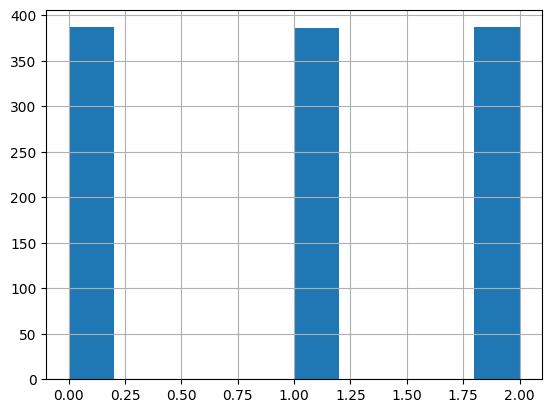

In [60]:
df['actual_productivity'].hist()

# Entrenamiento

In [62]:
# División del Dataset para entrenamiento y testeo
X= df.drop('actual_productivity', axis=1)
y= df['actual_productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [63]:
# Definición de modelos mediante pipelines
pipelines=[]

pipelines.append(('KNN5',make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5)))) #KNN, con 5 vecinos
pipelines.append(('KNN10',make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=10)))) #KNN, con 10 vecinos
pipelines.append(('RandomForest',make_pipeline(StandardScaler(), RandomForestClassifier(random_state=20)))) #RamdonForest
pipelines.append(('SVR',make_pipeline(StandardScaler(), SVC(random_state=20)))) #SVR
pipelines.append(('GradientBoostingClassifier',make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=20)))) #GradientBoostingClassifier
pipelines.append(('AdaBoostClassifier',make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=20)))) #AdaBoostClassifier

In [64]:
# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# Genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

# Evalua cada pipeline en crosvalidacion
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy') #Cambie a accuracy en lugar de neg_mean_squared_error
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

KNN5: 0.47471264367816096 (0.044234210126192774)
KNN10: 0.45977011494252873 (0.03448275862068967)
RandomForest: 0.7390804597701149 (0.024137931034482727)
SVR: 0.5701149425287356 (0.03378606541769901)
GradientBoostingClassifier: 0.7494252873563217 (0.036996498711335826)
AdaBoostClassifier: 0.6563218390804597 (0.03793103448275862)


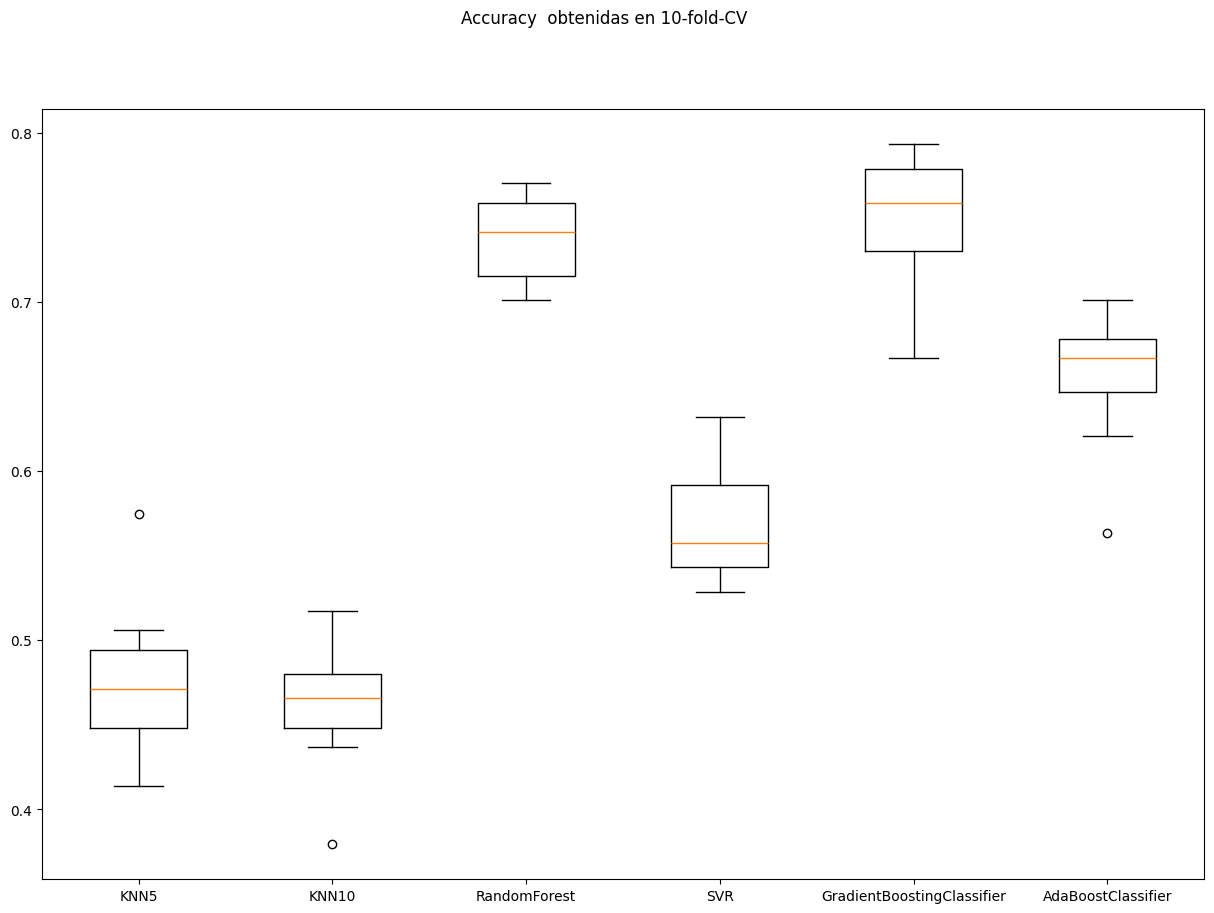

In [65]:
# Se muestra graficamente los resultados de neg_mean_squared_error (-MSE) en crossvalidacion de los pipelines evaluados
#Cambie a accuracy porque neg_mean_squared_error es para regression por lo que he visto
fig = plt.figure(figsize=(15,10))
fig.suptitle('Accuracy  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [66]:
# El mejor modelo resulante con menor -MSE es RandomForest
# Se procede con extraer el mejor modelo
best_model=pipelines[4][1]
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=20))])

In [67]:
# Entrenando el mejor modelo con toda la data de entrenamiento y obteniendo su predicción
best_model.fit(X_train, y_train)
y_predicted = best_model.predict(X_test)

In [68]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],           # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # Tasa de aprendizaje
    'max_features': ['sqrt', 'log2', None]     # Número de características a considerar por división
}

# Definir el GridSearchCV
grid_search = GridSearchCV(
    estimator=best_model[1],
    param_grid=param_grid,
    cv=5,                        # validación cruzada con 5 folds
    scoring='accuracy',          # score
    n_jobs=-1,
    verbose=2
)

# Ajustar el grid
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_parameter_model = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros encontrados:
{'learning_rate': 0.05, 'max_features': None, 'n_estimators': 100}


In [69]:
# Entrenando el mejor modelo con toda la data de entrenamiento y obteniendo su predicción
best_parameter_model.fit(X_train, y_train)
y_predicted = best_parameter_model.predict(X_test)

In [70]:
# Obtiendo las métricas
precision = precision_score(y_test, y_predicted, average='weighted')
recall = recall_score(y_test, y_predicted, average='weighted')
f1 = f1_score(y_test, y_predicted, average='weighted')
cm = confusion_matrix(y_test, y_predicted)

print("\nEvaluación del modelo:")
print("Precision (ponderada):", precision)
print("Recall (ponderada):", recall)
print("F1 Score (ponderada):", f1)
print("\nMatriz de Confusión:\n", cm)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_predicted))


Evaluación del modelo:
Precision (ponderada): 0.805104457415456
Recall (ponderada): 0.7965517241379311
F1 Score (ponderada): 0.7973476522358797

Matriz de Confusión:
 [[73  1 10]
 [13 83 12]
 [14  9 75]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79        84
           1       0.89      0.77      0.83       108
           2       0.77      0.77      0.77        98

    accuracy                           0.80       290
   macro avg       0.80      0.80      0.80       290
weighted avg       0.81      0.80      0.80       290



In [71]:
# Análisis de sensibilidad para obtener las variables más críticas

importances = pd.DataFrame({
    "columns": X_train.columns,
    "importances": best_model[1].feature_importances_
}).sort_values("importances", ascending=False)

importances.style.bar()

,columns,importances
3,incentive,0.397792
7,no_of_workers,0.220046
1,targeted_productivity,0.102291
2,over_time,0.093616
0,team,0.077174
9,dia,0.056068
8,mes,0.013197
12,quarter_Quarter3,0.009941
18,day_Thursday,0.004833
14,quarter_Quarter5,0.003752


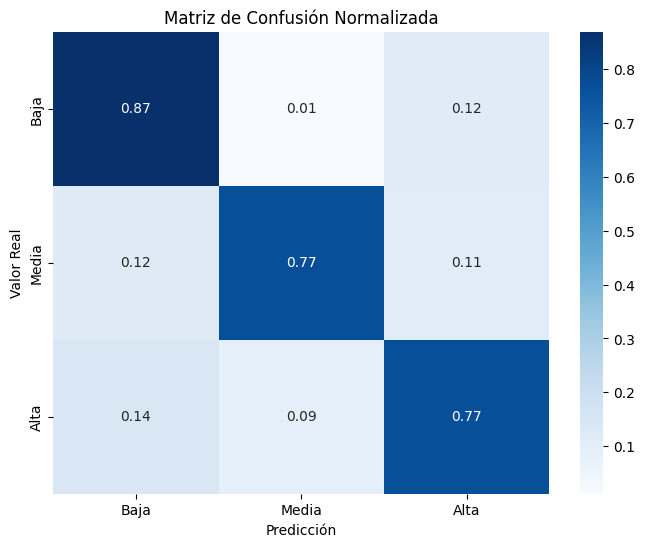

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión que se vea mejor para el informe
cm = confusion_matrix(y_test, y_predicted, normalize='true')

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión Normalizada")
plt.show()